#                                    Concept of Logistic Regression

Logistic Regression is a supervised ML technique to classify objects with a linear classifier


Logistic regression is used to analyze relationships between a dichotomous dependent variable wrt independent  features

Logistic regression combines the independent variables to estimate the probability that a particular event will  occur (i.e. a subject will be a member of one of the groups defined by the dichotomous dependent variable)
The value produced by logistic regression is a probability value between 0.0 and 1.0.

If the probability for group membership in the modeled category is above some cut point (the default is 0.50), the  subject is predicted to be a member of the modeled group (say, “YES”). If the probability is below the cut point,  the subject is predicted to be a member of the other group (say, “NO”).

For any given case, logistic regression computes the probability that a case with a particular set of values for the  independent variable is a member of the modeled category.

In [1]:

# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from pandas import set_option
# Figures inline and set visualization style
%matplotlib inline
sns.set()


## Importing the data sets using read_csv method from pandas

In [2]:
data1=pd.read_csv("BizContract.csv")    #The hsitorical data  of company on which we have to train our model.
data1                                   

,Result,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,1,P02,None,617.54,Mid,Direct,Yes,2,2,2,5,2
1,0,P05,High,10000.00,Lowest,Mixed,Yes,0,0,7,7,7
2,0,P09,None,3145.00,Lowest,Direct,Maybe,0,0,9,63,9
3,0,P07,None,100.00,Lowest,Direct,Yes,0,3,12,22,12
4,0,P07,None,900.00,Lowest,Direct,Maybe,36,36,36,108,36
5,1,P03,None,30.00,High,Direct,Maybe,0,0,0,0,0
6,0,P01,None,800.00,Lowest,Direct,Yes,20,20,20,60,20
7,1,P05,None,1900.00,High,Direct,Yes,0,0,0,0,0
8,1,P01,None,125.77,Low,Direct,Yes,5,5,5,15,5
9,1,P01,None,1500.00,High,Direct,Yes,0,0,0,0,0


## The data on which we have to predict using ML model.

In [3]:
pred = pd.read_csv("BizContract_Pred.csv")  
pred

,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,P01,None,1620.00,Lowest,Direct,Maybe,2,2,2,6,2
1,P01,None,227.06,Lowest,Direct,Maybe,0,0,0,0,0
2,P01,None,1500.00,Lowest,Direct,Maybe,75,75,75,226,75
3,P01,None,1000.00,Mid,Direct,Maybe,0,0,2,2,2
4,P03,Mid,4020.48,Mid,Mixed,Yes,3,3,3,8,3
5,P07,None,144.40,Low,Direct,Yes,0,0,0,0,0
6,P02,None,463705.73,Lowest,Mixed,Yes,0,2,3,8,3
7,P01,None,1000.00,Lowest,Direct,Maybe,53,53,53,158,53
8,P01,None,4321.60,High,Direct,Yes,0,0,0,0,0
9,P01,None,3000.00,Lowest,Direct,Maybe,0,0,0,22,0


# Predict variable (desired target):

y — has the Result? (binary: “1”, means “Contract Gain”, “0” means “Contract Loss”)


In [4]:
#no use in analysis ,so drop the product,no consideration in model building

#################  Basic operations
# drop the first column "Product" from both Base & pred
#data1.drop(data1.columns[[1]], axis=1, inplace=True)    #inplace=True on self; inplace=False returns a copy 
#pred.drop(pred.columns[[0]], axis=1, inplace=True)    #inplace=True on self; inplace=False returns a copy 

# Logistic Regression Assumptions

Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.

The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.

Logistic regression requires quite large sample sizes.
Keeping the above assumptions in mind, let’s look at our dataset.

## DATA DESCRIPTION (NATURE AND FEATURES OF DATA)`

In [5]:
####################### Basic records
# head
set_option('display.width', 90)
print(data1.head(5))
print(pred.head(5))


   Result Product PriceDiscount     Value Priority SalesChannel Competiton  \
0       1     P02          None    617.54      Mid       Direct        Yes   
1       0     P05          High  10000.00   Lowest        Mixed        Yes   
2       0     P09          None   3145.00   Lowest       Direct      Maybe   
3       0     P07          None    100.00   Lowest       Direct        Yes   
4       0     P07          None    900.00   Lowest       Direct      Maybe   

   Duration_Stage1  Duration_Stage2  Duration_Stage3  Duration_Stage4  Duration_Stage5  
0                2                2                2                5                2  
1                0                0                7                7                7  
2                0                0                9               63                9  
3                0                3               12               22               12  
4               36               36               36              108               36

In [6]:
# shape
print(data1.shape)
print(pred.shape)

(750, 12)
(250, 11)


### Tell us that there are 12 columns(features) and 750 rows/fields.

In [7]:
# types
set_option('display.max_rows', 500)
print(data1.dtypes)
print(pred.dtypes)

Result               int64
Product             object
PriceDiscount       object
Value              float64
Priority            object
SalesChannel        object
Competiton          object
Duration_Stage1      int64
Duration_Stage2      int64
Duration_Stage3      int64
Duration_Stage4      int64
Duration_Stage5      int64
dtype: object
Product             object
PriceDiscount       object
Value              float64
Priority            object
SalesChannel        object
Competiton          object
Duration_Stage1      int64
Duration_Stage2      int64
Duration_Stage3      int64
Duration_Stage4      int64
Duration_Stage5      int64
dtype: object


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
Result             750 non-null int64
Product            750 non-null object
PriceDiscount      750 non-null object
Value              750 non-null float64
Priority           750 non-null object
SalesChannel       750 non-null object
Competiton         750 non-null object
Duration_Stage1    750 non-null int64
Duration_Stage2    750 non-null int64
Duration_Stage3    750 non-null int64
Duration_Stage4    750 non-null int64
Duration_Stage5    750 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 70.4+ KB


### To get statistical distribution of data using description

In [9]:
# Data description: base
#set_option('display.width', 100)
#set_option('precision', 2)
description = data1.describe()
print(description)

           Result          Value  Duration_Stage1  Duration_Stage2  Duration_Stage3  \
count  750.000000     750.000000       750.000000       750.000000       750.000000   
mean     0.493333    7299.496947         3.004000         5.546667         7.576000   
std      0.500289   31000.301905         7.366705         9.946443        12.122823   
min      0.000000       0.100000         0.000000         0.000000         0.000000   
25%      0.000000     500.000000         0.000000         0.000000         0.000000   
50%      0.000000    1500.000000         0.000000         0.000000         2.000000   
75%      1.000000    4800.000000         2.000000         8.000000        10.000000   
max      1.000000  600080.000000        61.000000        61.000000        71.000000   

       Duration_Stage4  Duration_Stage5  
count       750.000000       750.000000  
mean         18.184000         7.576000  
std          26.589211        12.122823  
min           0.000000         0.000000  
25%   

In [10]:
# Pred description: pred
set_option('display.width', 100)
set_option('precision', 2)
description = pred.describe()
print(description)

           Value  Duration_Stage1  Duration_Stage2  Duration_Stage3  Duration_Stage4  \
count     250.00           250.00           250.00           250.00           250.00   
mean     6588.17             2.80             5.46             7.56            18.29   
std     31116.91             7.75            10.71            12.71            28.74   
min         0.10             0.00             0.00             0.00             0.00   
25%       500.00             0.00             0.00             0.00             0.00   
50%      1349.90             0.00             0.00             2.00             7.00   
75%      4240.76             2.00             6.00             9.00            25.00   
max    463705.73            75.00            75.00            75.00           226.00   

       Duration_Stage5  
count           250.00  
mean              7.56  
std              12.71  
min               0.00  
25%               0.00  
50%               2.00  
75%               9.00  
max    

# DATA EXPLORATION USING EDA(EXPLORATORY DATA ANALYSIS)

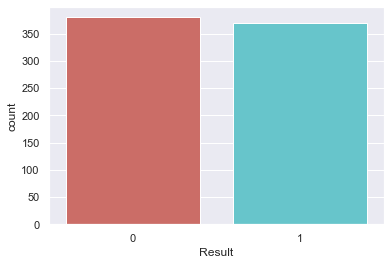

In [11]:
sns.countplot(x="Result",data=data1,palette="hls")
plt.show()                                           #checking sucess and failure on data/train set

## TAKE AWAY:
The company is losing more contracts then gaining .

In [12]:
pd.crosstab(data1.Competiton, data1.Result, margins=True).style.background_gradient(cmap='autumn_r')

Result,0,1,All
Competiton,,,
Maybe,191,153,344
No,7,4,11
Yes,182,213,395
All,380,370,750


## TakeAway:-
There is no significant effect on contract(gain/lose) when there is no competiton.

In [13]:
pd.crosstab(data1.Priority, data1.Result, margins=True).style.background_gradient(cmap='autumn_r')

Result,0,1,All
Priority,,,
High,2,142,144
Low,28,55,83
Lowest,322,110,432
Mid,28,63,91
All,380,370,750


## TakeAway:-
Company will lose most of contracts when the prority is lowest and max contract gain when the priority is high,
hence go with high priority.

In [14]:
pd.crosstab(data1.PriceDiscount, data1.Result, margins=True).style.background_gradient(cmap='autumn_r')


Result,0,1,All
PriceDiscount,,,
High,8,40,48
Low,2,2,4
Mid,5,5,10
None,365,316,681
Very_High,0,7,7
All,380,370,750


## TakeAway:-
All we have to worry about is when there is no priority hence we should look only upon that factor.

In [15]:
data1.groupby("Result").mean()

,Value,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
Result,,,,,,
0,7203.95,4.98,9.01,12.36,29.22,12.36
1,7397.63,0.98,1.99,2.66,6.85,2.66


In [16]:
data1.groupby("Competiton").mean()

,Result,Value,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
Competiton,,,,,,,
Maybe,0.44,3489.48,3.99,7.05,9.31,21.92,9.31
No,0.36,1350.00,1.91,3.09,4.55,9.73,4.55
Yes,0.54,10783.27,2.17,4.30,6.15,15.17,6.15


In [17]:
data1.groupby("Priority").mean()

,Result,Value,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
Priority,,,,,,,
High,0.99,3483.46,0.11,0.20,0.32,0.63,0.32
Low,0.66,7146.87,1.06,1.61,1.99,5.60,1.99
Lowest,0.25,9189.50,4.91,9.12,12.48,29.82,12.48
Mid,0.69,4504.92,0.33,0.63,0.89,2.19,0.89


In [18]:
data1.groupby("PriceDiscount").mean()

,Result,Value,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
PriceDiscount,,,,,,,
High,0.83,6684.18,1.15,1.69,2.98,7.02,2.98
Low,0.50,2197.94,2.00,2.00,2.00,7.50,2.00
Mid,0.50,5469.48,0.10,0.30,1.00,2.40,1.00
None,0.46,7447.39,3.21,5.97,8.11,19.45,8.11
Very_High,1.00,2660.86,0.00,0.00,0.14,0.29,0.14


/home/evil_overlord/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


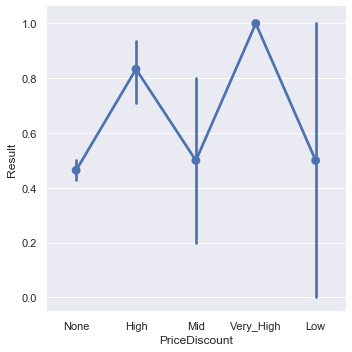

In [19]:
sns.factorplot('PriceDiscount','Result', data=data1)
plt.show()

## Take Away:-
When the price discount is very high,high chances of getting the contract.

In [20]:
pd.crosstab([data1.Priority, data1.Result], data1.PriceDiscount, margins=True).style.background_gradient(cmap='autumn_r')

## TakeAway:-
When the price discount is none and priority is lowest max contracts will be losed,and when priority is high then max gain.

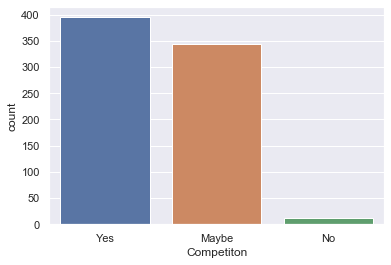

In [21]:
sns.countplot(x='Competiton', data=data1)


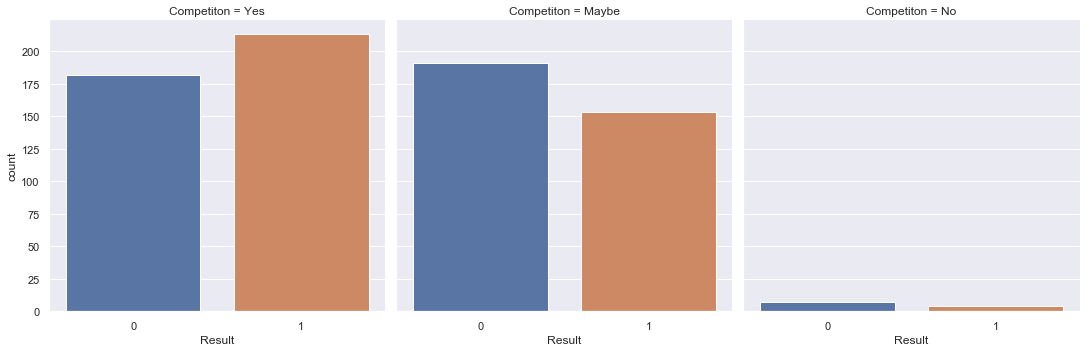

In [22]:
sns.factorplot(x='Result', col='Competiton', kind='count', data=data1) # when you have to chec kthe var. acc .to the parti. feature

In [23]:
data1.groupby(['Competiton']).Result.sum()

Competiton
Maybe    153
No         4
Yes      213
Name: Result, dtype: int64

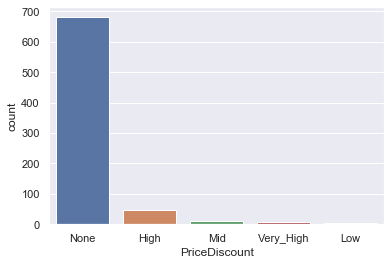

In [24]:
sns.countplot(x='PriceDiscount',data=data1)

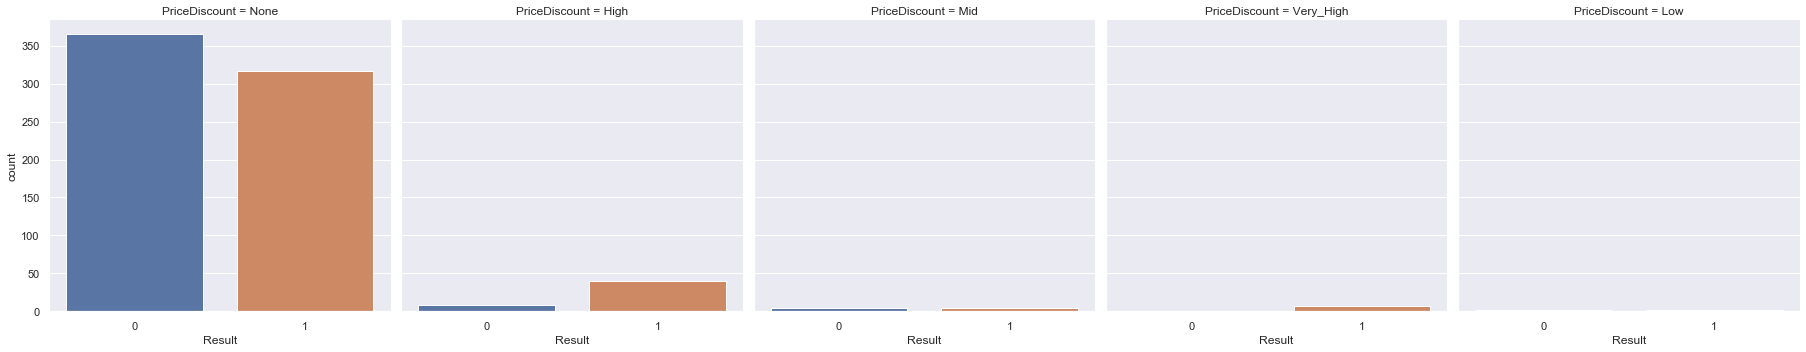

In [25]:
sns.factorplot(x='Result', col='PriceDiscount', kind='count', data=data1)

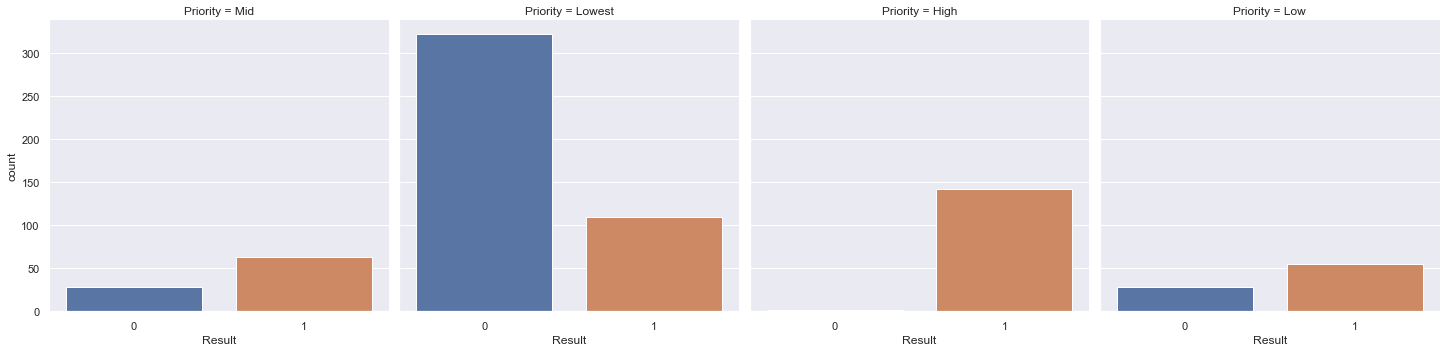

In [26]:
sns.factorplot(x='Result', col='Priority', kind='count', data=data1)

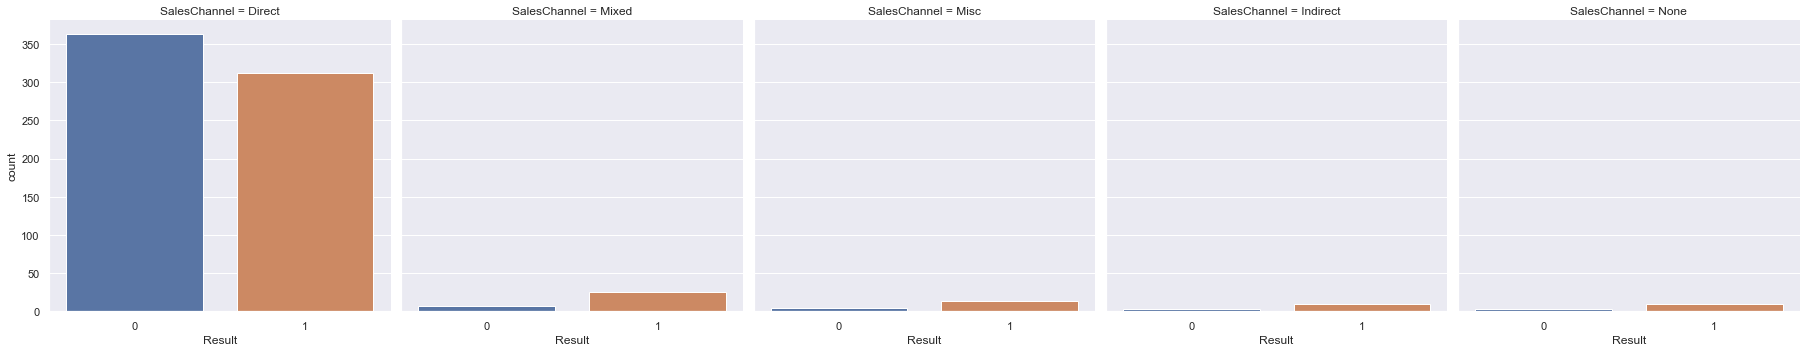

In [27]:
sns.factorplot(x='Result', col='SalesChannel', kind='count', data=data1)

## EDA with Numeric Variables
#Use seaborn to plot a histogram of the 'Fare' column of df_train

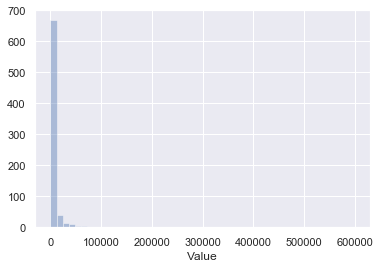

In [28]:
sns.distplot(data1.Value, kde=False)

## Take Away:
Suggest that maximum contracts are price below 50,000.

Result
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

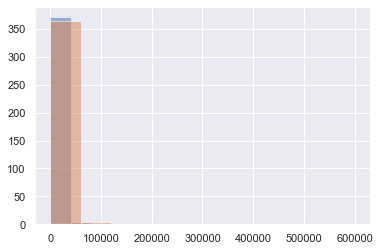

In [29]:
data1.groupby('Result').Value.hist(alpha=0.5)

## Take Away:
Gives us that all the contracts lies only in the region less tahn 50,000.

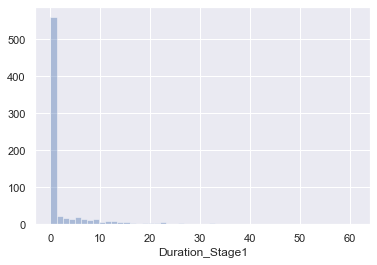

In [30]:
sns.distplot(data1.Duration_Stage1,kde=False)

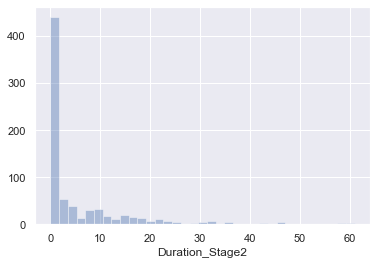

In [31]:
sns.distplot(data1.Duration_Stage2,kde=False)

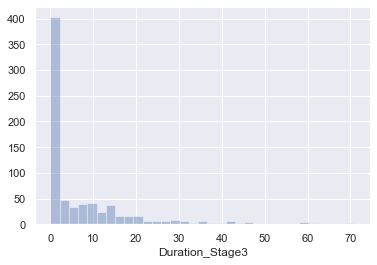

In [32]:
sns.distplot(data1.Duration_Stage3,kde=False)

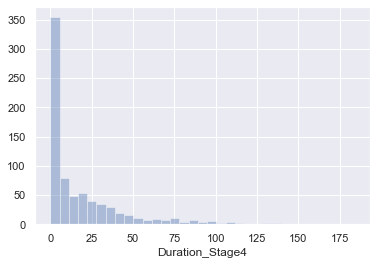

In [33]:
sns.distplot(data1.Duration_Stage4,kde=False)

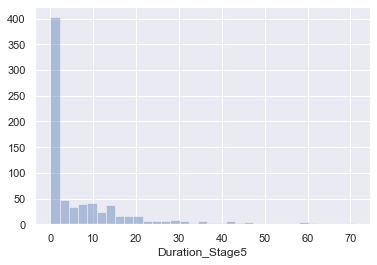

In [34]:
sns.distplot(data1.Duration_Stage5,kde=False)

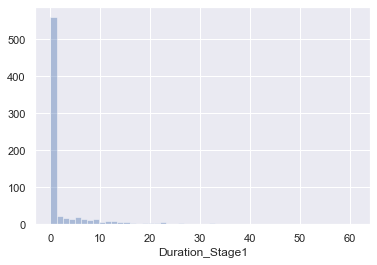

In [35]:
sns.distplot(data1.Duration_Stage1,kde=False)

/home/evil_overlord/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


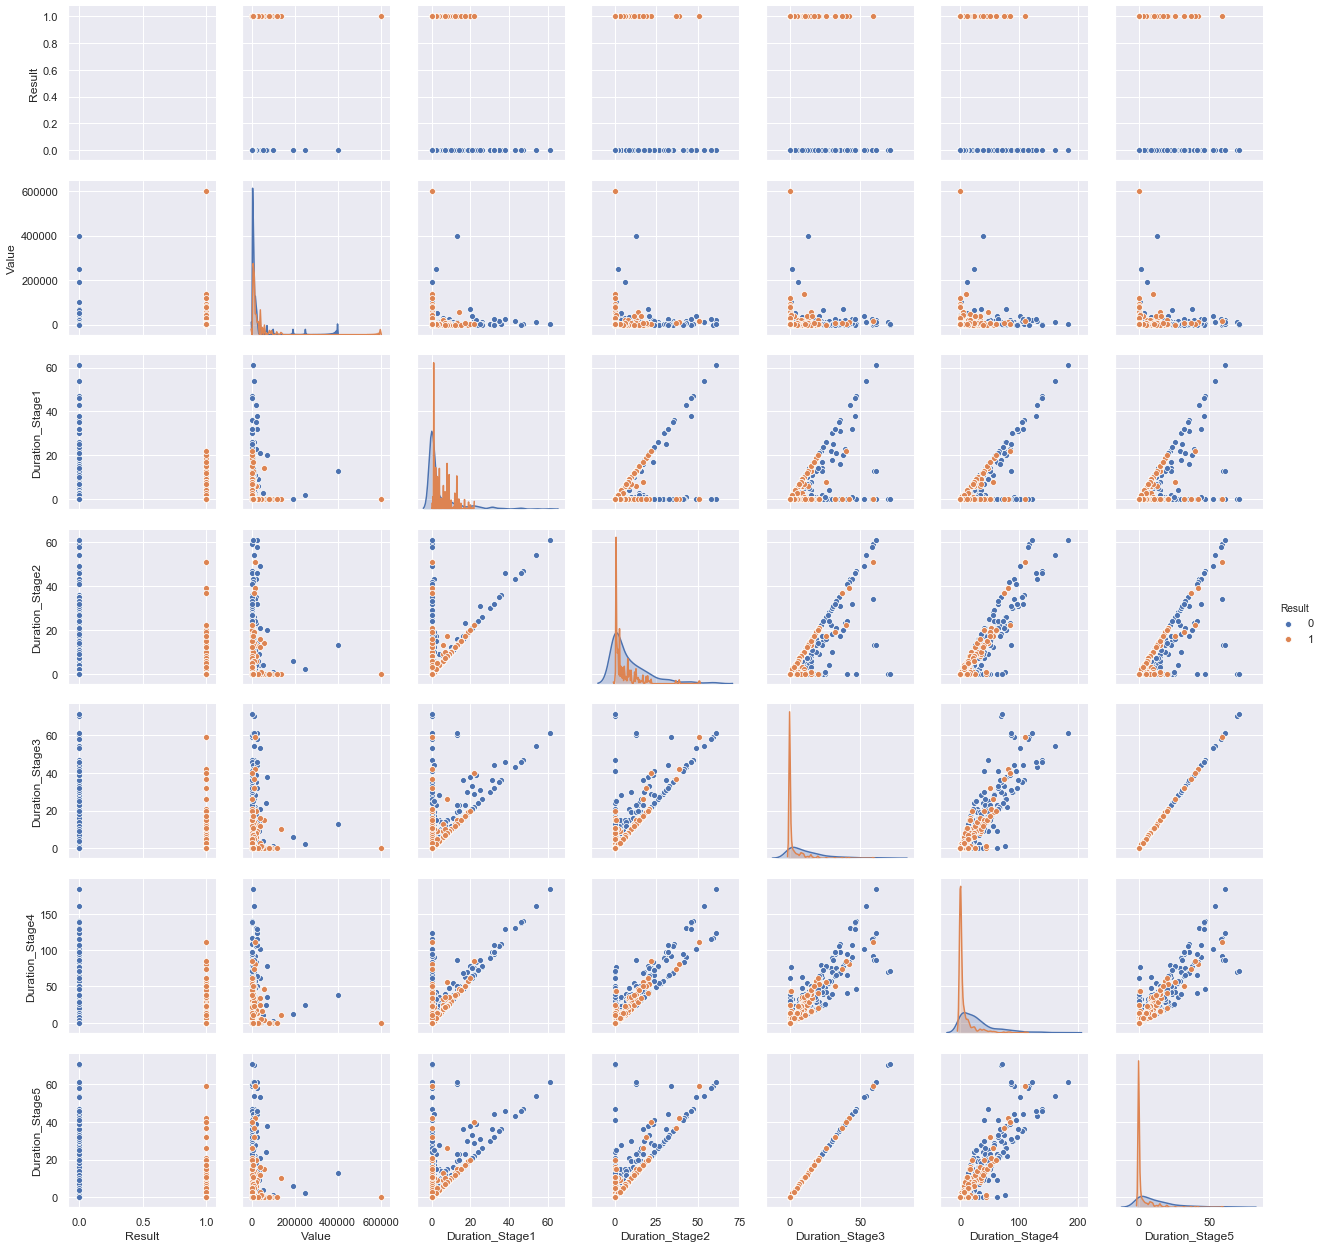

In [36]:
sns.pairplot(data1, hue='Result')   # As A Matrix

##                                            HEAT MAP

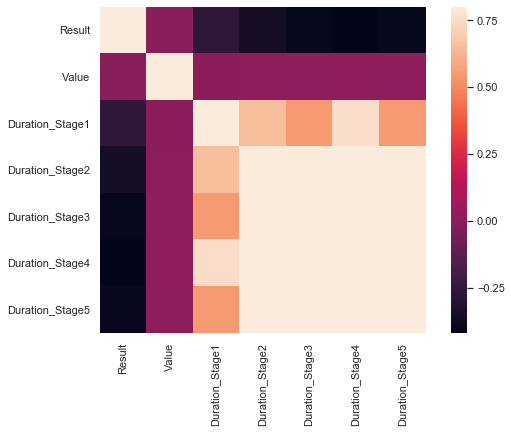

In [37]:
# Correlation matrix
corrmat = data1.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

In [38]:
# Create dummy
df_dummy = pd.get_dummies(data1)
df_dummy.columns

Index(['Result', 'Value', 'Duration_Stage1', 'Duration_Stage2', 'Duration_Stage3',
       'Duration_Stage4', 'Duration_Stage5', 'Product_P01', 'Product_P02', 'Product_P03',
       'Product_P04', 'Product_P05', 'Product_P06', 'Product_P07', 'Product_P08', 'Product_P09',
       'Product_P10', 'Product_P11', 'Product_P12', 'PriceDiscount_High', 'PriceDiscount_Low',
       'PriceDiscount_Mid', 'PriceDiscount_None', 'PriceDiscount_Very_High', 'Priority_High',
       'Priority_Low', 'Priority_Lowest', 'Priority_Mid', 'SalesChannel_Direct',
       'SalesChannel_Indirect', 'SalesChannel_Misc', 'SalesChannel_Mixed', 'SalesChannel_None',
       'Competiton_Maybe', 'Competiton_No', 'Competiton_Yes'],
      dtype='object')

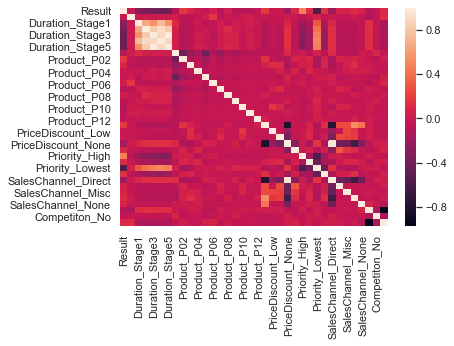

In [39]:
# Corr of dummy larger data (for exploration)

sns.heatmap(df_dummy.corr())
plt.show()

# Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or 
worst performing feature, setting the feature aside and then repeating the process with the rest of the features.
This process is applied until all features in the dataset are exhausted. 
The goal of RFE is to select features by recursively 
considering smaller and smaller sets of features.

The example below uses RFE with the logistic regression algorithm to select the top 3 features.
The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Value","Duration_Stage1","Duration_Stage2","Duration_Stage3","Duration_Stage4","Duration_Stage5",] 
X = data1[cols]       #features
y = data1['Result']  #target variable
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Num Features: 3
Selected Features: [False False  True False  True  True]
Feature Ranking: [4 3 1 2 1 1]
Selected features: ['Duration_Stage2', 'Duration_Stage4', 'Duration_Stage5']


/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##                                TOP 3 FEATURES BEING SELECTED.

In [41]:
# set random seed
import random
random.seed(5)

In [42]:
from patsy import dmatrices

## DMATRICES BY DEFAULT TAKE TARGET VARIABLE AND FAETURES

In [43]:
# prep data
y, X = dmatrices('Result~C(PriceDiscount)+Value+C(Priority)+C(SalesChannel)+C(Competiton)+Duration_Stage1+Duration_Stage2+ \
                           Duration_Stage3+Duration_Stage4+Duration_Stage5',data1, return_type="dataframe")
print(X.columns)  #concept of dmtrices to convert categorical variables into 0,,1 and excluding one var as a base

Index(['Intercept', 'C(PriceDiscount)[T.Low]', 'C(PriceDiscount)[T.Mid]',
       'C(PriceDiscount)[T.None]', 'C(PriceDiscount)[T.Very_High]', 'C(Priority)[T.Low]',
       'C(Priority)[T.Lowest]', 'C(Priority)[T.Mid]', 'C(SalesChannel)[T.Indirect]',
       'C(SalesChannel)[T.Misc]', 'C(SalesChannel)[T.Mixed]', 'C(SalesChannel)[T.None]',
       'C(Competiton)[T.No]', 'C(Competiton)[T.Yes]', 'Value', 'Duration_Stage1',
       'Duration_Stage2', 'Duration_Stage3', 'Duration_Stage4', 'Duration_Stage5'],
      dtype='object')


In [44]:

# flatten y into a 1-D array
y = np.ravel(y)#putting y into array
print(y.size)
(y)

750


array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1.

## IMPORT LIBRARIES FROM SCIKIT-LEARN FOR PERFORMANCE EVALUATION

In [45]:
from sklearn import metrics  #or ml ,metrices for performances
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split#spliiting a train test
from sklearn.model_selection import KFold  #cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  #algorithm to be fitting

# Train ~ Test Split > Model > Evaluation
Steps: train ~ test split log regression on train y ~ train X apply on test performance metrics

In [46]:
# Train ~ Test Split.underscilitlearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105)#split into two parts test and train
#test stte is 30% ie 30/70 ratio,random for  seed,750 obs so 30% means  225 obs for testing of x
#multiple vars in a single line,tarin test for bot x and y
logmodel = LogisticRegression()
logfit = logmodel.fit(X_train, y_train)
logfit

/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## PREDICTING ON MODEL USING TEST DATA.

In [47]:

# predict class labels for the test set
y_pred = logfit.predict(X_test)
print(y_pred)

print(len(y_pred))
print(y_pred[y_pred==1].size)

[1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1.]
225
97


### ACCURACY FOR OUR LOGISTIC REGRESSION MODEL.

In [48]:
#Predicting the test set results and calculating the accuracy

y_pred = logfit.predict(X_test)
print('Accuracy of logistic regression classifier on test set in % is :: {:.2f} '.format(logfit.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set in % is :: 79.11 


In [49]:
# generate class probabilities
probs = logfit.predict_proba(X_test)
print(probs)   # Note: Classifier sets Class= 1 when prob. in the second column > 0.5
#we will looking nly for p,which is 2nd col

[[0.07650908 0.92349092]
 [0.29255761 0.70744239]
 [0.70976621 0.29023379]
 [0.87405435 0.12594565]
 [0.75667067 0.24332933]
 [0.94159464 0.05840536]
 [0.82329264 0.17670736]
 [0.09043333 0.90956667]
 [0.28144889 0.71855111]
 [0.69532226 0.30467774]
 [0.47144808 0.52855192]
 [0.0846543  0.9153457 ]
 [0.10198473 0.89801527]
 [0.13182389 0.86817611]
 [0.07590573 0.92409427]
 [0.10182116 0.89817884]
 [0.10203927 0.89796073]
 [0.330459   0.669541  ]
 [0.62616746 0.37383254]
 [0.76984404 0.23015596]
 [0.33870576 0.66129424]
 [0.30398483 0.69601517]
 [0.42125801 0.57874199]
 [0.0334388  0.9665612 ]
 [0.07592646 0.92407354]
 [0.93291214 0.06708786]
 [0.99676247 0.00323753]
 [0.78896192 0.21103808]
 [0.15137438 0.84862562]
 [0.83562187 0.16437813]
 [0.33083964 0.66916036]
 [0.98647894 0.01352106]
 [0.18789789 0.81210211]
 [0.12535387 0.87464613]
 [0.94541891 0.05458109]
 [0.08315858 0.91684142]
 [0.87014989 0.12985011]
 [0.9790265  0.0209735 ]
 [0.10202418 0.89797582]
 [0.9970075  0.0029925 ]


In [50]:
##Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94 13]
 [34 84]]


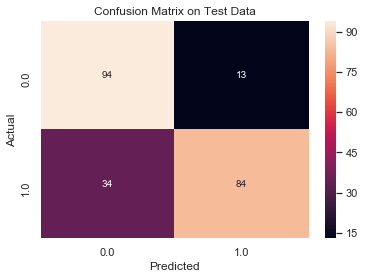

In [51]:
###################### plot CF Metrics ########################
import pylab as pl
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='.0f')
plt.title('Confusion Matrix on Test Data')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.plt.show()


### RIGHTLY PREDICTED:94+84=178
WRONGLY PREDICTED:34+13=47

# Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of 
beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [52]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print(metrics.confusion_matrix(y_test, y_pred))  #takes 2 args ,true value and predicted
print(metrics.classification_report(y_test, y_pred))



0.7911111111111111
0.8474972279423413
[[94 13]
 [34 84]]
              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80       107
         1.0       0.87      0.71      0.78       118

    accuracy                           0.79       225
   macro avg       0.80      0.80      0.79       225
weighted avg       0.80      0.79      0.79       225



# MODEL CLASSIFICATION:

In [53]:
# check classification scores of logistic regression

########################## ROC/AUC Plots
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.79111
LogisticRegression log_loss is 0.513
LogisticRegression auc is 0.847


/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# ROC Curve

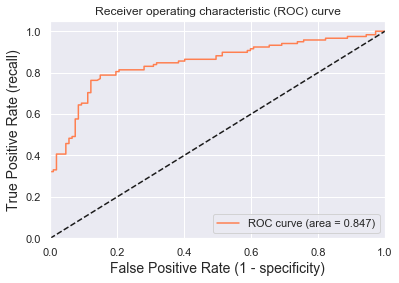

In [54]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")

plt.show()
#more steeper the curve,lower is the chance of selection of false values

## Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. 
We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [55]:
############################################################################################################
############################### # Cross-Validation on entire base data  ####################################
############################################################################################################
# evaluate the model using 10-fold cross-validation
# Use cross_val_score function
# Let's use the entire of X and y, not X_train or y_train, as it takes care of splitting the data into 10 parts
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - although there are many

scores_accuracy = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)#10 fold,x is entire datset,part
#ioning on 10 ,9:1,10 times acuuarcy score
scores_log_loss = cross_val_score(LogisticRegression(), X, y, scoring='neg_log_loss', cv=10) 
scores_auc = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=10) 

scores_accuracy.mean()
#################################

/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

0.7826666666666666

## 10-fold cross validation average accuracy: 0.78

The average accuracy remains very close to the Logistic Regression model accuracy; 
hence, we can conclude that our model generalizes well.

0.7826666666666666


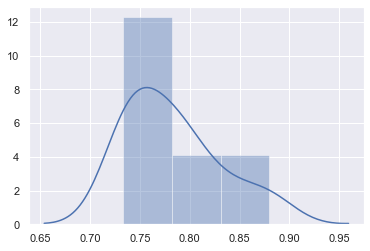

In [56]:
sns.distplot(scores_accuracy,bins=3)
print(scores_accuracy.mean())

-0.47089749113524404


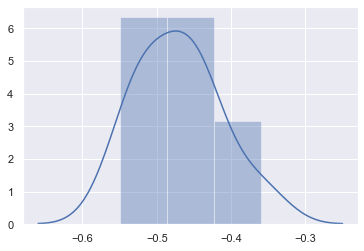

In [57]:
sns.distplot(scores_log_loss,bins=3)
print(scores_log_loss.mean())

0.8556899004267425


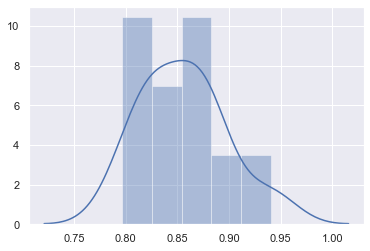

In [58]:
# auc
sns.distplot(scores_auc,bins=5)
print(scores_auc.mean())

## FINAL PREDICTION ON MODEL

In [59]:


                                     #    FINAL PREDICTION ON PRED  Data    #
############################################################################################################

# Create dummy on base data
data1.dtypes
df_dummy = pd.get_dummies(data1)
print(df_dummy.columns)
print(df_dummy.dtypes)

Index(['Result', 'Value', 'Duration_Stage1', 'Duration_Stage2', 'Duration_Stage3',
       'Duration_Stage4', 'Duration_Stage5', 'Product_P01', 'Product_P02', 'Product_P03',
       'Product_P04', 'Product_P05', 'Product_P06', 'Product_P07', 'Product_P08', 'Product_P09',
       'Product_P10', 'Product_P11', 'Product_P12', 'PriceDiscount_High', 'PriceDiscount_Low',
       'PriceDiscount_Mid', 'PriceDiscount_None', 'PriceDiscount_Very_High', 'Priority_High',
       'Priority_Low', 'Priority_Lowest', 'Priority_Mid', 'SalesChannel_Direct',
       'SalesChannel_Indirect', 'SalesChannel_Misc', 'SalesChannel_Mixed', 'SalesChannel_None',
       'Competiton_Maybe', 'Competiton_No', 'Competiton_Yes'],
      dtype='object')
Result                       int64
Value                      float64
Duration_Stage1              int64
Duration_Stage2              int64
Duration_Stage3              int64
Duration_Stage4              int64
Duration_Stage5              int64
Product_P01                  uint8

In [60]:
# Create dummy on prediction data
pred_dummy = pd.get_dummies(pred)
pred_dummy.dtypes

Value                      float64
Duration_Stage1              int64
Duration_Stage2              int64
Duration_Stage3              int64
Duration_Stage4              int64
Duration_Stage5              int64
Product_P01                  uint8
Product_P02                  uint8
Product_P03                  uint8
Product_P04                  uint8
Product_P05                  uint8
Product_P06                  uint8
Product_P07                  uint8
Product_P08                  uint8
Product_P09                  uint8
Product_P10                  uint8
Product_P11                  uint8
Product_P12                  uint8
PriceDiscount_High           uint8
PriceDiscount_Low            uint8
PriceDiscount_Mid            uint8
PriceDiscount_None           uint8
PriceDiscount_Very_High      uint8
Priority_High                uint8
Priority_Low                 uint8
Priority_Lowest              uint8
Priority_Mid                 uint8
SalesChannel_Direct          uint8
SalesChannel_Indirec

### FOR A FINAL MODEL WE WILL CREATE NEW X AND y I.E TAKE THE PREVIOUUS DATA1 AS A REFERENCE FOR THIS MODEL ,CONSIDER THE Y ITSEKF AS A TARGET AND TAKE X HERE AS REAMINING COLS EXCEPT Y
HENCE X=DF_DUMMY AND Y AS A TARGET


In [61]:
# Define X & y
y = df_dummy['Result']     

# Remove SalesAfterCat from df_dummy
df_dummy.drop(df_dummy.columns[[0]], axis=1, inplace=True)    #inplace=True on self; inplace=False returns a copy 

In [62]:
# Fit model on {y, df_dummy} and apply on pred_dummy
logmodel = LogisticRegression()
logfit = logmodel.fit(df_dummy, y)
y_pred_fin = logfit.predict(pred_dummy)
y_pred_fin5=pd.DataFrame(y_pred_fin)   # Convert to df
print(y_pred_fin5)

     0
0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    0
10   0
11   1
12   0
13   0
14   1
15   1
16   1
17   1
18   0
19   1
20   0
21   1
22   1
23   1
24   0
25   0
26   0
27   0
28   0
29   1
30   0
31   0
32   1
33   0
34   1
35   0
36   0
37   0
38   0
39   0
40   1
41   0
42   1
43   0
44   1
45   1
46   1
47   0
48   0
49   1
50   0
51   0
52   1
53   1
54   0
55   1
56   1
57   1
58   0
59   1
60   1
61   0
62   1
63   1
64   0
65   0
66   1
67   0
68   1
69   0
70   1
71   0
72   0
73   0
74   0
75   0
76   1
77   1
78   0
79   0
80   1
81   0
82   1
83   1
84   1
85   0
86   1
87   0
88   1
89   1
90   1
91   0
92   0
93   0
94   0
95   0
96   1
97   1
98   1
99   1
100  0
101  1
102  0
103  0
104  0
105  0
106  1
107  0
108  1
109  1
110  0
111  1
112  1
113  1
114  1
115  0
116  1
117  1
118  0
119  1
120  1
121  0
122  0
123  1
124  0
125  0
126  0
127  1
128  1
129  0
130  1
131  0
132  0
133  0
134  0
135  0
136  1
137  0
138  0
139  0
140  1
141  0

/home/evil_overlord/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
# Cbind with main data(on which you have to predict)  & final prediction in a .csv
dff=pd.concat([pred.reset_index(drop=True), y_pred_fin5.reset_index(drop=True)], axis=1)    
dff.columns

Index([        'Product',   'PriceDiscount',           'Value',        'Priority',
          'SalesChannel',      'Competiton', 'Duration_Stage1', 'Duration_Stage2',
       'Duration_Stage3', 'Duration_Stage4', 'Duration_Stage5',                 0],
      dtype='object')

In [64]:
dff=dff.rename(columns = {0:'Logreg_Prediction (y)'})  #Renaming the col name from 0 to logreg_pred
dff.columns

Index(['Product', 'PriceDiscount', 'Value', 'Priority', 'SalesChannel', 'Competiton',
       'Duration_Stage1', 'Duration_Stage2', 'Duration_Stage3', 'Duration_Stage4',
       'Duration_Stage5', 'Logreg_Prediction (y)'],
      dtype='object')

In [65]:
# Print / Export
dff.to_csv('Pred_LogisticRegreesion.csv', index=False)    #index of row must nor be shown